# Выявление определяющих успешность игры закономерностей

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

Нужно выявить определяющие успешность игры закономерности. 

Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Шаг 1. Открыть файл с данными и изучить общую информацию

Шаг 2. Подготовить данные

Шаг 3. Провести исследовательский анализ данных

Шаг 4. Составить портрет пользователя каждого региона

Шаг 5. Проверить гипотезы

Шаг 6. Написать общий вывод

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

# Шаг 1. Открыть файл с данными и изучить общую информацию

In [61]:
df = pd.read_csv('/datasets/games.csv')

In [62]:
display(df.info())
display(df.head(10))
display(df.tail(10))
display(df.sample(10))
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16705,15 Days,PC,2009.0,Adventure,0.00,0.01,0.00,0.0,63.0,5.8,NaN
16706,Men in Black II: Alien Escape,GC,2003.0,Shooter,0.01,0.00,0.00,0.0,NaN,tbd,T
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.0,NaN,NaN,NaN
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
10522,The King of Fighters: Dream Match 1999,DC,1999.0,Fighting,0.00,0.00,0.10,0.00,NaN,NaN,NaN
15971,Star Trek: Legacy,PC,2006.0,Simulation,0.00,0.01,0.00,0.00,56.0,4,E10+
6477,Tom and Jerry in War of the Whiskers,PS2,2002.0,Fighting,0.13,0.10,0.00,0.03,NaN,NaN,NaN
296,Namco Museum Vol.3,PS,1996.0,Misc,2.28,1.55,0.16,0.06,NaN,NaN,NaN
4662,Wheel of Fortune,DS,2010.0,Misc,0.39,0.00,0.00,0.03,NaN,tbd,E
11434,Seven Samurai 20XX,PS2,2004.0,Action,0.04,0.03,0.00,0.01,52.0,7,T
4047,Backyard Baseball,PS2,2004.0,Sports,0.24,0.19,0.00,0.06,NaN,7.2,E
1742,Tom Clancy's Ghost Recon: Jungle Storm,PS2,2004.0,Shooter,0.57,0.44,0.00,0.15,70.0,6.3,T
9825,Shin Megami Tensei: Devil Survivor 2,3DS,2015.0,Role-Playing,0.00,0.02,0.09,0.00,NaN,NaN,NaN
2583,pro evolution soccer 2011,PSP,2010.0,Sports,0.05,0.30,0.29,0.16,74.0,5.8,E


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


У половины игр отсутствует рейтинг критиков.

В данных о продажах есть выбросы (3-й квартиль меньше 1, а максимальное значение - несколько десятков).

# Шаг 2. Подготовить данные

[x] Заменить названия столбцов (приведите к нижнему регистру);

[x] Преобразвать данные в нужные типы. Описать, в каких столбцах заменили тип данных и почему;

[x] Обработать пропуски при необходимости;

[x] Объяснить, почему заполнили пропуски определённым образом или почему не стали это делать;

[x] Описать причины, которые могли привести к пропускам;

[x] Отдельно разобрать аббревиатуру 'tbd' в столбцах с рейтингом и описать, как его обработать;

[x] Посчитать суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [63]:
df.columns = df.columns.str.lower()

In [64]:
df.query('user_score == "tbd"')['user_score'].count()

2424

In [65]:
display((df[(df['user_score'].isna() == False) & (df['user_score'] != 'tbd')])['user_score'].apply(float).mean())
display((df[(df['user_score'].isna() == False) & (df['user_score'] != 'tbd')])['user_score'].apply(float).median())

7.125046113306983

7.5

2424 из 10014 значений (24%) в столбце user_score - это tbd. Эту аббревиатуру можно расшифровать как "будет определено", поэтому эти значения можно заменить. (Можно расшифровать и как "будет удалено", но замена этих значений на пустые приведёт только к увеличению пропущенных значений.) Так как среднее и медиана не сильно различаются, заменим на среднее, потому что оно меньше.

In [66]:
df.loc[df['user_score'] == 'tbd', ['user_score']] = 'NaN'

In [67]:
df['user_score'] = df['user_score'].astype('float')

In [68]:
df[df['name'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Жанры пропущенны только в двух строках, в тех же, где пропущены названия названия игр, поэтому эти строки можно удалить.

In [69]:
df.dropna(subset=['name'], inplace=True)

In [70]:
df['name'] = df['name'].str.lower()
df['platform'] = df['platform'].str.lower()
df['genre'] = df['genre'].str.lower()

In [71]:
df.duplicated().sum()

0

In [74]:
df['year_of_release'] = df['year_of_release'].fillna(df['year_of_release'].median())

Пропущенные значения в столбцах user_score, critic_score, year_of_release заменены на медианные, пропущенные значения в столбце rating оставлены без изменений.

Пропуски могли возникнуть из-за ошибок ввода или проблем с исходными файлами.

In [75]:
df['year_of_release'] = df['year_of_release'].astype('int')

Тип данных в стобцах critic_score и year_of_release изменён на int. Если изменить год на datetime, появятся лишние данные о дате и времени. В столбце critic_score выброчно просмотренные значения целые, в отличие от столбца user_score. Так память будет расходоваться эффективнее.

In [76]:
df['all_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

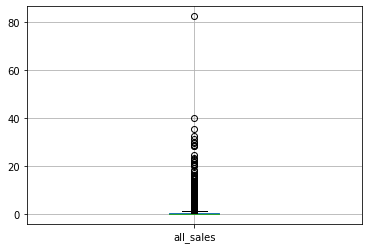

In [77]:
df.boxplot(column='all_sales');

In [78]:
df = df.query('all_sales < 80')

Избавились от выброса.

# Шаг 3. Провести исследовательский анализ данных

[x] Посмотреть, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

[x] Посмотреть, как менялись продажи по платформам. Выбрать платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

[x] Взять данные за соответствующий актуальный период.

[x] Не учитывать в работе данные за предыдущие годы.

[x] Какие платформы лидируют по продажам, растут или падают? Выбрать несколько потенциально прибыльных платформ.

[x] Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

[x] Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулирвать выводы.

[x] Соотнести выводы с продажами игр на других платформах.

[x] Посмотреть на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [79]:
df['year_of_release'].value_counts()

2007    1461
2008    1428
2009    1426
2010    1255
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     764
2012     653
2015     606
2014     581
2013     545
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1987      16
1990      16
1988      15
1984      14
1985      14
1980       9
Name: year_of_release, dtype: int64

In [80]:
display(df.query('2006 <= year_of_release <= 2011')['year_of_release'].count())
display(df.query('year_of_release < 2006 or year_of_release > 2011')['year_of_release'].count())
display(df.query('year_of_release < 2006 or year_of_release > 2011')['year_of_release'].count() - df.query('2006 <= year_of_release <= 2011')['year_of_release'].count())

7712

9000

1288

Больше всего игр выпускалось в 2006 - 2011 годах. Суммарное количество игр, выпущенных за эти пять лет на 1281 меньше, чем количество игр, выпущенных с 1980 по 2005 и с 2007 по 2016 (34 года).

In [81]:
df.groupby('platform')['all_sales'].sum().sort_values(ascending=False)

platform
ps2     1255.77
x360     971.42
ps3      939.65
wii      824.97
ds       806.12
ps       730.86
gba      317.85
ps4      314.14
psp      294.05
pc       259.52
3ds      259.00
xb       257.74
gb       255.46
nes      251.05
n64      218.68
snes     200.04
gc       198.93
xone     159.32
2600      96.98
wiiu      82.19
psv       54.07
sat       33.59
gen       28.35
dc        15.95
scd        1.86
ng         1.44
ws         1.42
tg16       0.16
3do        0.10
gg         0.04
pcfx       0.03
Name: all_sales, dtype: float64

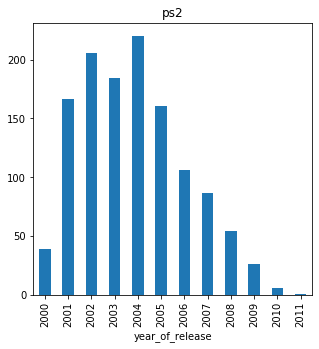

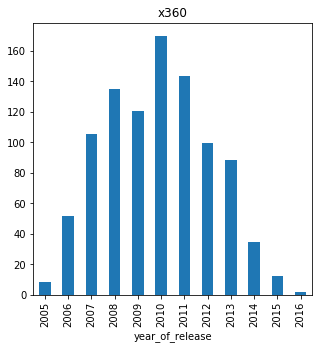

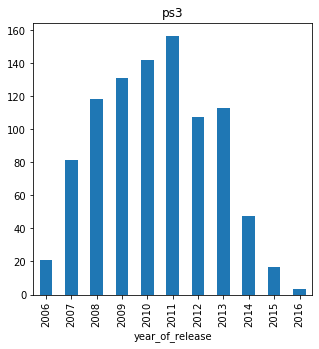

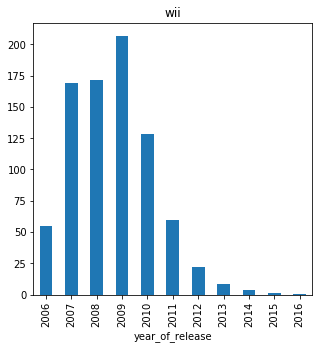

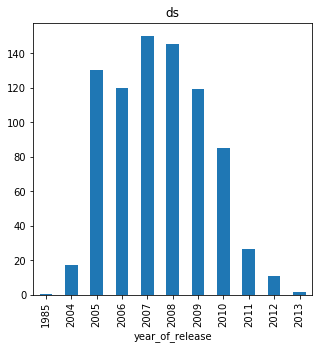

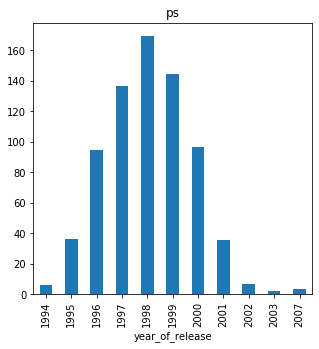

In [82]:
platforms = ['ps2', 'x360', 'ps3', 'wii', 'ds', 'ps']
for i in platforms:
    df.query('platform == @i').groupby('year_of_release')['all_sales'].sum().plot(kind='bar', title = i, figsize=(5,5))
    plt.show()

Три платформы с наибольшими суммарными продажами исчезли за 10 лет.

In [84]:
df_actual = df.query('year_of_release >= 2011')

Актуальный период - 5 лет.

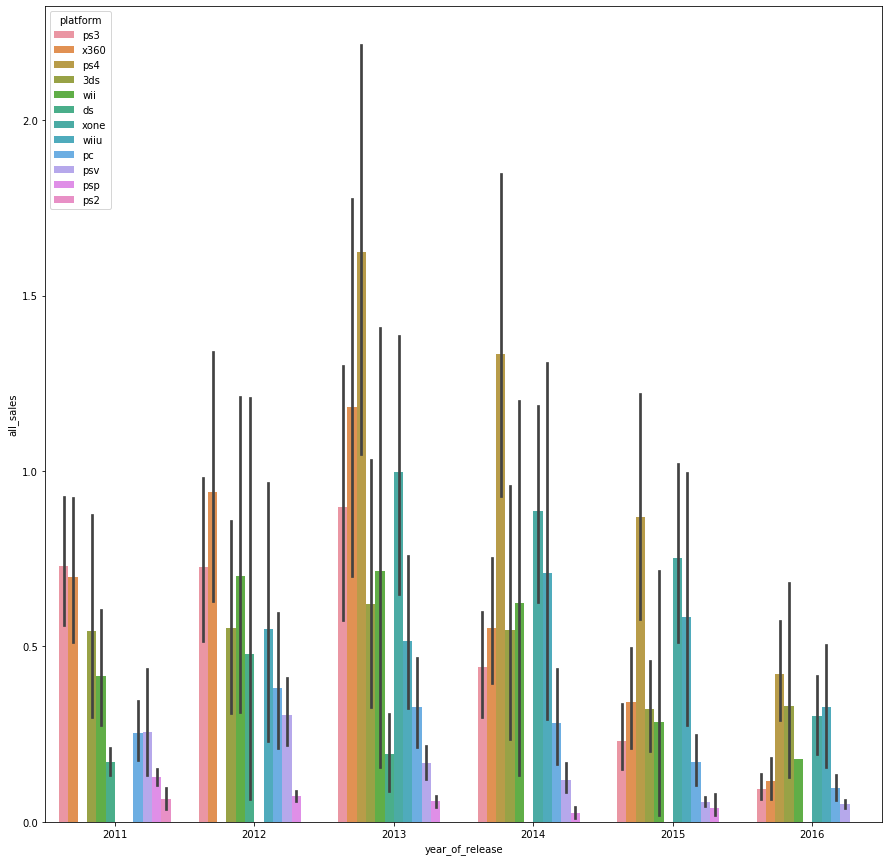

In [87]:
fig, axes = plt.subplots(1, 1, figsize=(15, 15))
sns.barplot(x='year_of_release', y='all_sales', hue='platform', data=df_actual);

In [88]:
df_actual.groupby('platform')['all_sales'].sum().sort_values(ascending=False)

platform
ps3     445.57
x360    380.38
ps4     314.14
3ds     257.81
xone    159.32
pc       98.03
wii      95.02
wiiu     82.19
psv      53.81
ds       38.73
psp      29.01
ps2       0.45
Name: all_sales, dtype: float64

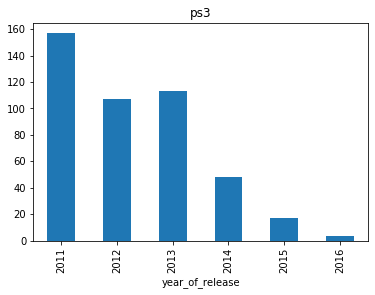

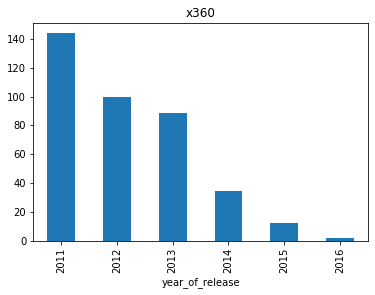

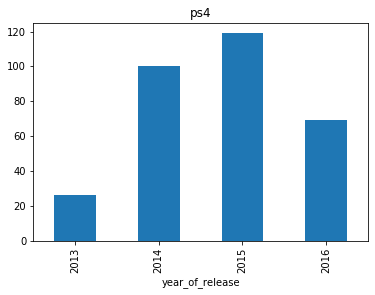

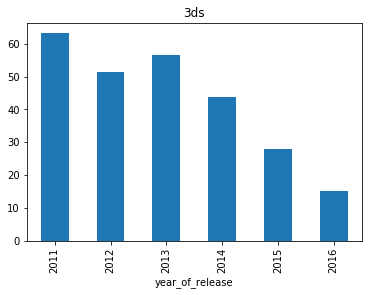

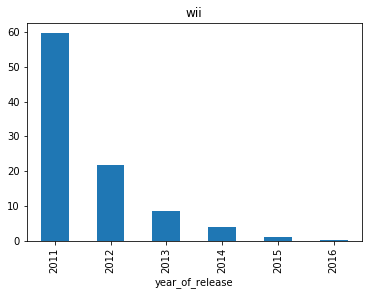

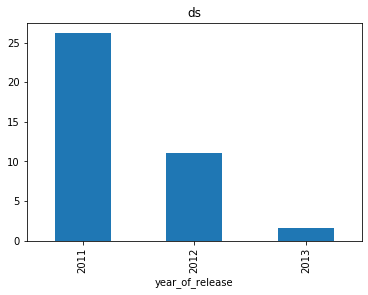

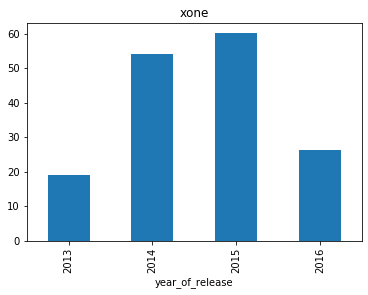

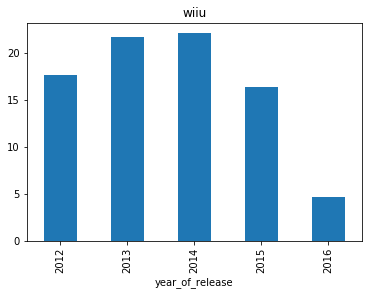

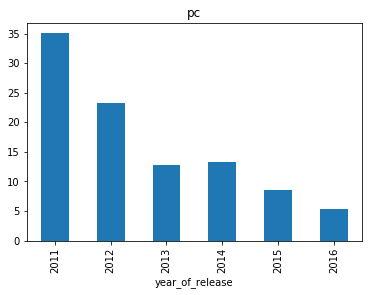

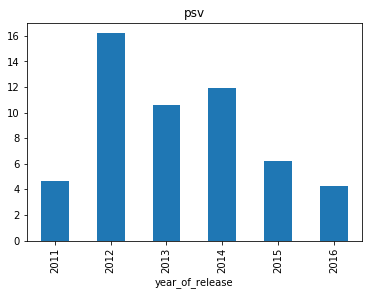

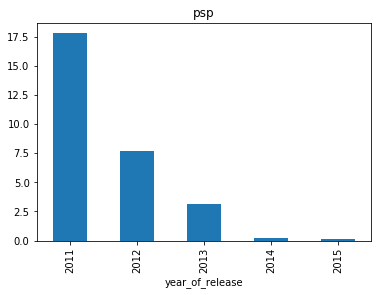

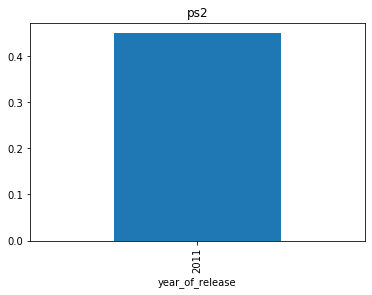

In [89]:
for i in df_actual['platform'].unique():
    df_actual.query('platform == @i').groupby('year_of_release')['all_sales'].sum().plot(kind='bar', title = i)
    plt.show()

In [90]:
df_actual.groupby('platform')['all_sales'].sum().sort_values(ascending=False)

platform
ps3     445.57
x360    380.38
ps4     314.14
3ds     257.81
xone    159.32
pc       98.03
wii      95.02
wiiu     82.19
psv      53.81
ds       38.73
psp      29.01
ps2       0.45
Name: all_sales, dtype: float64

In [91]:
df_actual.query('year_of_release == 2016').groupby('platform')['all_sales'].sum().sort_values(ascending=False)

platform
ps4     69.25
xone    26.15
3ds     15.14
pc       5.25
wiiu     4.60
psv      4.25
ps3      3.60
x360     1.52
wii      0.18
Name: all_sales, dtype: float64

- лидируют по продажам следующие платформы: ps3, x360, ps4, продажи игр для этих платформ падают;
- наименьшие продажи на платформах: ds, psp, ps2;
- продажи на всех платформах падают;
- из платформ, которые в топе продаж за пять лет (ps3, x360, ps4, 3ds, xone), большие продажи в 2016 году только у трёх: ps4, xone, 3ds. Думаю, их можно считать перспективными.

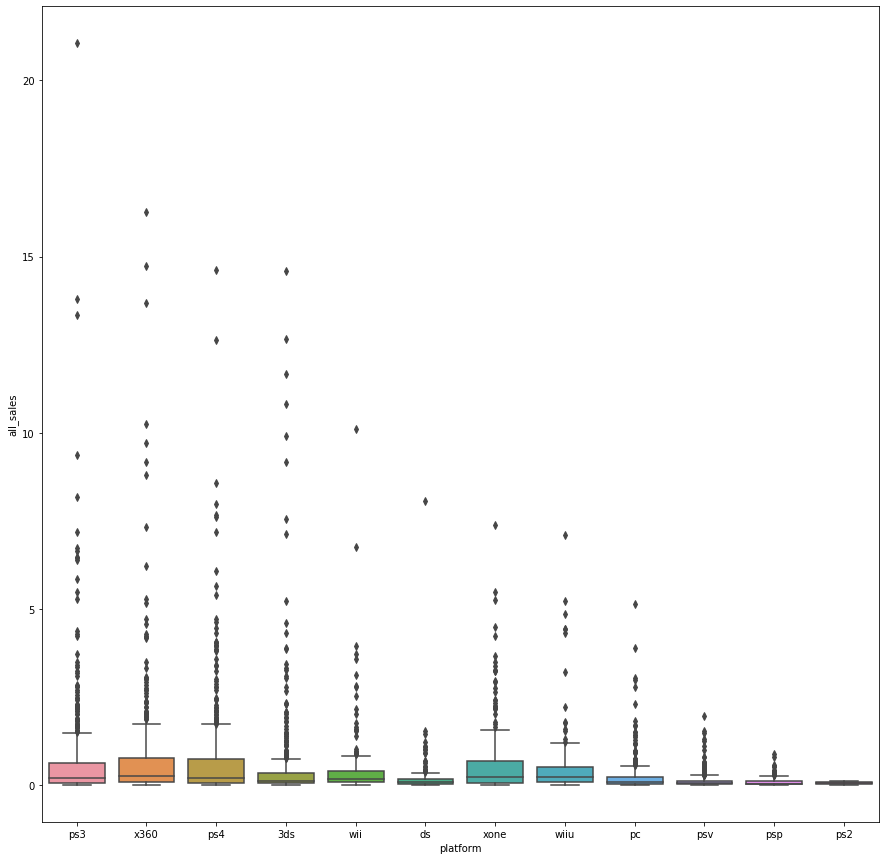

In [92]:
plt.figure(figsize=(15,15))
sns.boxplot(data=df_actual, x='platform', y='all_sales');

Выбросы могли возникнуть из-за того, что в какой-то год на определённой платформе вышла одна или несколько очень популярных игр.

У платформ с большими суммарными продажами есть выбросы, большинство значений больше третьего квартиля.

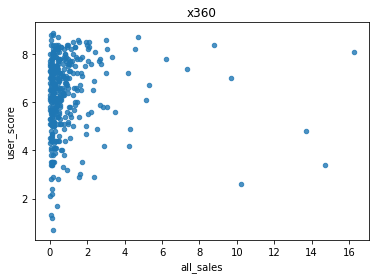

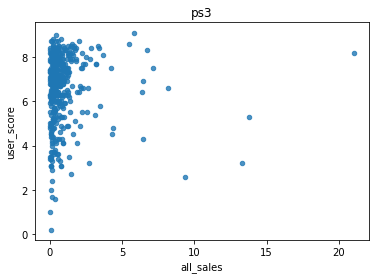

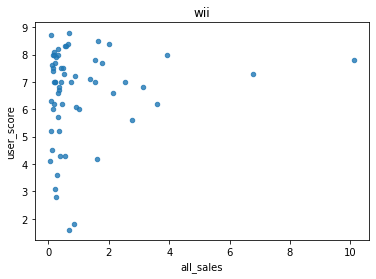

In [93]:
df_actual.query('platform =="x360"').plot(kind='scatter', x='all_sales', y='user_score', alpha = .8, title='x360')
plt.show()
df_actual.query('platform =="ps3"').plot(kind='scatter', x='all_sales', y='user_score', alpha = .8, title='ps3')
plt.show()
df_actual.query('platform =="wii"').plot(kind='scatter', x='all_sales', y='user_score', alpha = .8, title='wii')
plt.show()

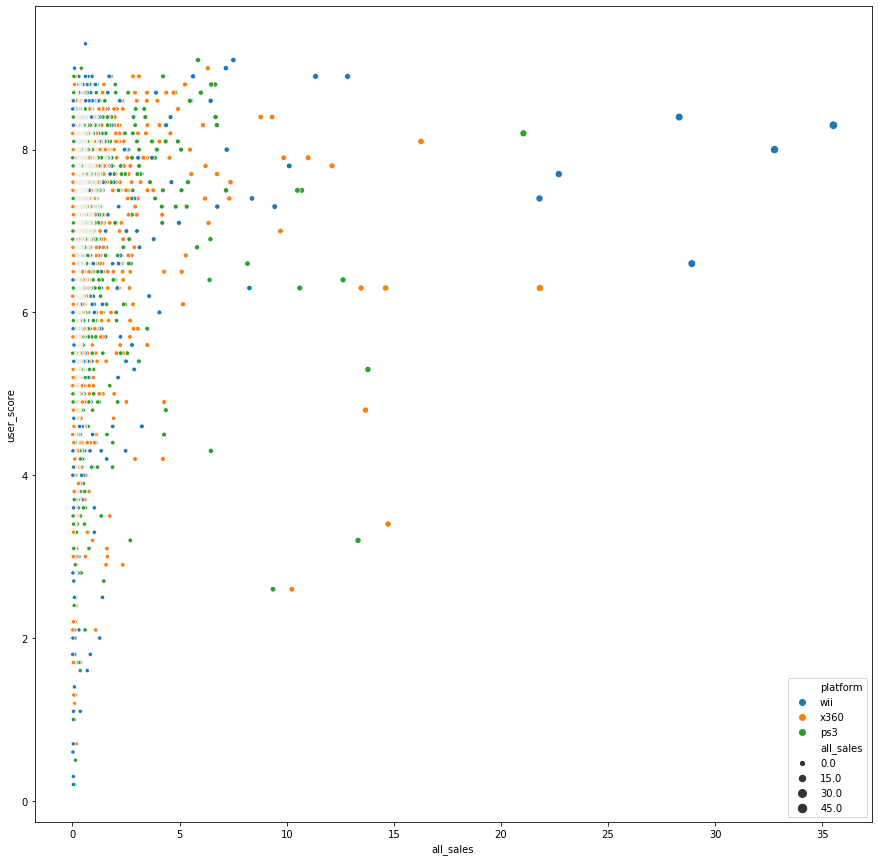

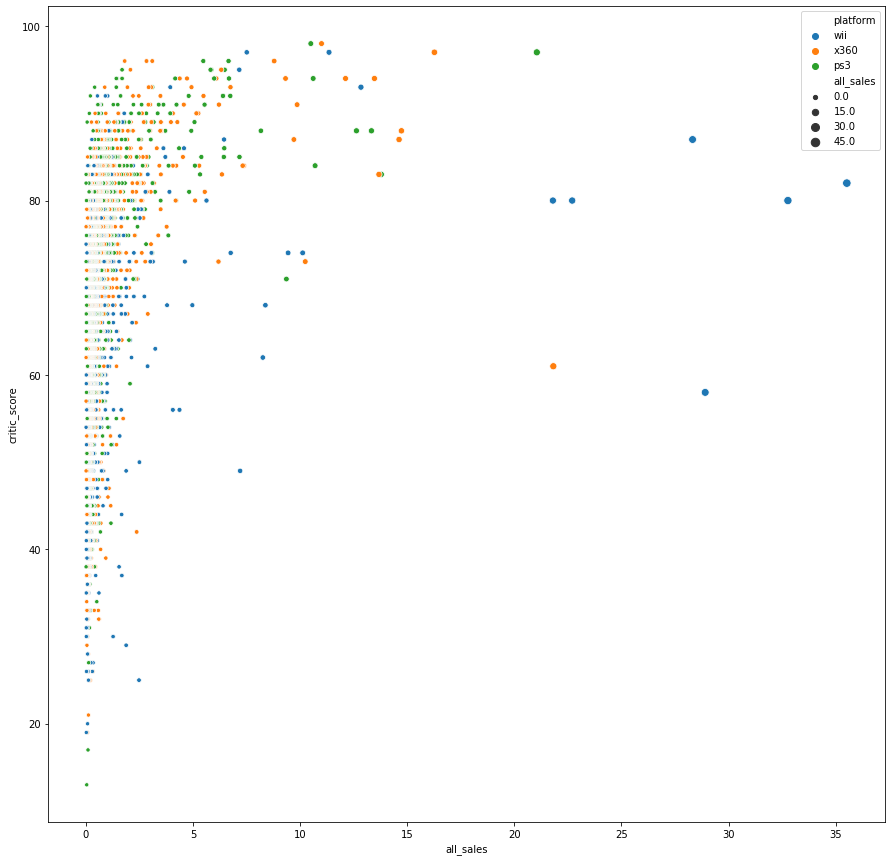

In [94]:
actual_best_platforms = ['x360', 'ps3', 'wii']
actual_best_platforms = df.query('platform in @actual_best_platforms')
plt.figure(figsize=(15,15))
sns.scatterplot(x='all_sales', y='user_score', data=actual_best_platforms, hue='platform', size='all_sales')
plt.show()
plt.figure(figsize=(15,15))
sns.scatterplot(x='all_sales', y='critic_score', data=actual_best_platforms, hue='platform', size='all_sales')
plt.show()

In [95]:
display(df_actual['all_sales'].corr(df_actual['user_score']))
display(df_actual['all_sales'].corr(df_actual['critic_score']))

display(actual_best_platforms['all_sales'].corr(actual_best_platforms['user_score']))
display(actual_best_platforms['all_sales'].corr(actual_best_platforms['critic_score']))

0.03146721944805148

0.32968319023196163

0.12219859340303986

0.3156779978496043

Между продажами и оценками пользователей и критиков нет значимой корреляции.

In [96]:
df_actual['genre'].value_counts()

action          1270
role-playing     465
adventure        410
sports           389
misc             375
shooter          329
racing           180
fighting         159
simulation       136
platform         122
strategy         117
puzzle            71
Name: genre, dtype: int64

Самые популярные жанры: action, role-playing, adventure, sports, misc. 

Самые непопулярные жанры: strategy, puzzle.

In [97]:
df_actual.groupby('genre')['all_sales'].sum().sort_values(ascending=False)

genre
action          558.15
shooter         402.91
role-playing    245.63
sports          237.15
misc            139.42
platform         88.68
racing           88.31
fighting         66.90
simulation       50.26
adventure        45.04
strategy         22.16
puzzle            9.85
Name: all_sales, dtype: float64

Самые продаваемые жанры: action, shooter, role-playing, sports, misc. 

Самые непродаваемые жанры: strategy, puzzle.

In [98]:
genre_pivot = df_actual.pivot_table(index='genre', values='all_sales', aggfunc=('sum', 'count'))
genre_pivot.reset_index(inplace=True)
genre_pivot['sales per unit'] = genre_pivot['sum'] / genre_pivot['count']
genre_pivot

,genre,count,sum,sales per unit
0,action,1270,558.15,0.439488
1,adventure,410,45.04,0.109854
2,fighting,159,66.90,0.420755
3,misc,375,139.42,0.371787
4,platform,122,88.68,0.726885
5,puzzle,71,9.85,0.138732
6,racing,180,88.31,0.490611
7,role-playing,465,245.63,0.528237
8,shooter,329,402.91,1.224650
9,simulation,136,50.26,0.369559


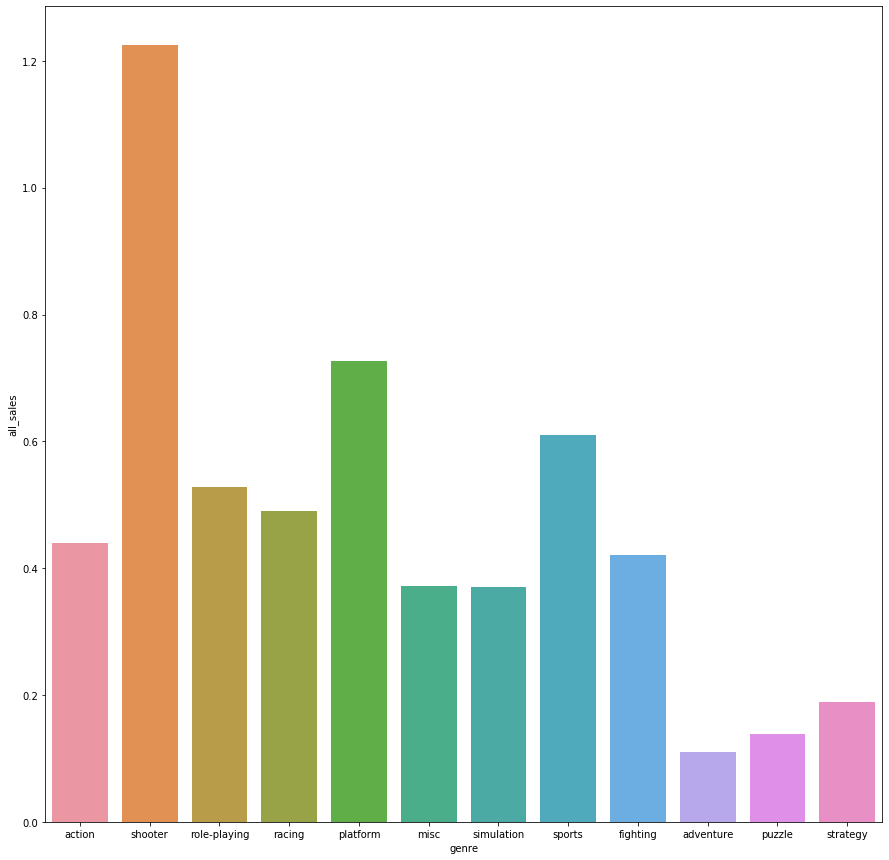

In [99]:
plt.figure(figsize=(15,15))
sns.barplot(data=df_actual, y='all_sales', x='genre', ci=None);

Игр жанра action значительно больше, чем игр других жанров (в три раза больше, чем игр каждого из других популярных жанров).
    
Жанр shooter имеет больше продаж на единицу игры, чем каждый из остальных жанров, в том числе популярных.

# Шаг 4. Составить портрет пользователя каждого региона

Определить для пользователя каждого региона (NA, EU, JP):

[x] Самые популярные платформы (топ-5). Описать различия в долях продаж.

[x] Самые популярные жанры (топ-5). Поясить разницу.

[x] Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [100]:
na_platform = pd.DataFrame(data=df_actual.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5))
na_platform.reset_index(inplace=True)
na_platform['share'] = na_platform['na_sales'] / df_actual['na_sales'].sum()
display(na_platform)
eu_platform = pd.DataFrame(data=df_actual.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5))
eu_platform.reset_index(inplace=True)
eu_platform['share'] = eu_platform['eu_sales'] / df_actual['eu_sales'].sum()
display(eu_platform)
jp_platform = pd.DataFrame(data=df_actual.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5))
jp_platform.reset_index(inplace=True)
jp_platform['share'] = jp_platform['jp_sales'] / df_actual['jp_sales'].sum()
display(jp_platform)

,platform,na_sales,share
0,x360,226.80,0.273312
1,ps3,168.26,0.202767
2,ps4,108.74,0.131040
3,xone,93.12,0.112217
4,3ds,82.65,0.099600


,platform,eu_sales,share
0,ps3,163.10,0.243418
1,ps4,141.09,0.210570
2,x360,117.10,0.174766
3,3ds,61.27,0.091442
4,pc,56.95,0.084995


,platform,jp_sales,share
0,3ds,100.62,0.409607
1,ps3,49.39,0.201058
2,psp,24.04,0.097863
3,psv,21.84,0.088907
4,ps4,15.96,0.064970


Самые популярные платформы в Северной Америке: x360, ps3, ps4, xone, 3ds. Для платформы x360 (первая в топе) продано в 2,7 раз больше игр, чем для платформы 3ds (последняя в топе).

Самые популярные платформы в Европе: ps3, ps4, x360, 3ds, pc. Для платформы ps3 (первая в топе) продано в 3 раза больше игр, чем для платформы pc.

Самые популярные платформы в Японии: 3ds, ps3, psp, psv, ps4. Для платформы 3ds (первая в топе) продано в 7 раз больше игр, чем для платформы ps4.

На каждую из популярных платформ в регионе приходится от 1 до 4 процентов всех продаж по региону.

In [101]:
na_genre = pd.DataFrame(data=df_actual.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5))
na_genre.reset_index(inplace=True)
na_genre['share'] = na_genre['na_sales'] / df_actual['na_sales'].sum()
display(na_genre)
eu_genre = pd.DataFrame(data=df_actual.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5))
eu_genre.reset_index(inplace=True)
eu_genre['share'] = eu_genre['eu_sales'] / df_actual['eu_sales'].sum()
display(eu_genre)
jp_genre = pd.DataFrame(data=df_actual.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5))
jp_genre.reset_index(inplace=True)
jp_genre['share'] = jp_genre['jp_sales'] / df_actual['jp_sales'].sum()
display(jp_genre)

,genre,na_sales,share
0,action,230.98,0.278350
1,shooter,194.43,0.234304
2,sports,108.70,0.130992
3,role-playing,83.78,0.100962
4,misc,69.69,0.083982


,genre,eu_sales,share
0,action,199.37,0.297549
1,shooter,148.02,0.220912
2,sports,88.48,0.132052
3,role-playing,62.30,0.092980
4,racing,40.58,0.060564


,genre,jp_sales,share
0,role-playing,79.87,0.325137
1,action,63.62,0.258986
2,misc,17.60,0.071647
3,fighting,12.38,0.050397
4,platform,12.13,0.049379


Самые популярные жанры в Северной Америке: action, shooter, sports, role-playing, misc. Игр жанра action (первый в топе) продано в 3 раза больше, чем игр жанра misc (последний в топе). На каждый из популярных жанров в регионе приходится от 8 до 27 процентов всех продаж по региону.

Самые популярные жанры в Европе: action, shooter, sports, role-playing, racing. Игр жанра action (первый в топе) продано в 5 раз больше, чем игр жанра racing (последний в топе). На каждый из популярных жанров в регионе приходится от 6% до 29% всех продаж по региону.

Самые популярные жанры в Японии: role-playing, action, misc, fighting, platform. Игр жанра role-playing (первый в топе) продано в 7 раз больше, чем игр жанра platform (последний в топе). На каждый из популярных жанров в регионе приходится от 4% до 32% всех продаж по региону. Игры жанра role-playing составляют треть всех проданных игр. 
    
    
В Японии среди популярных жанров нет жанров shooter и sports, который есть и в Северной Америке, и в Европе. В Европе в топе есть жанр racing, которого нет ни в Северной Америке, ни в Японии. В Японии в топе есть два жанра, которых нет в других регионах: fighting и platform. Доли продаж игр жанра role-playing в Северной Америке и Европе (10 и 9% соответственно) в три раза меньше, чем в Японии (32%).

In [102]:
df_actual.loc[(df_actual['rating'].isna() == True), ['rating']] = 'pass'

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


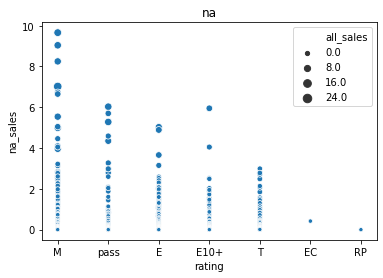

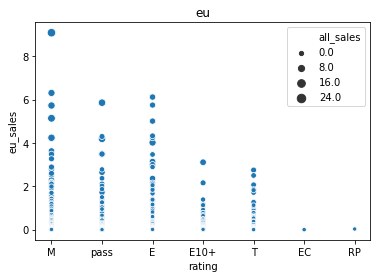

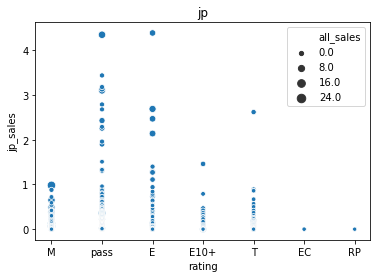

In [103]:
sns.scatterplot(x='rating', y='na_sales', data=df_actual, size='all_sales').set_title('na')
plt.show()
sns.scatterplot(x='rating', y='eu_sales', data=df_actual, size='all_sales').set_title('eu')
plt.show()
sns.scatterplot(x='rating', y='jp_sales', data=df_actual, size='all_sales').set_title('jp')
plt.show()

Игры с пропущенным возрастным рейтингом на втором месте по продажам в Северной Америке, на третьем в Европе и на первом месте в Японии.
    
В Японии больше продаж игр с рейтингом Е, чем с рейтингом М, а в Северной Америке и в Европе наборот.

In [104]:
df_actual.query('rating == "T"').groupby('genre')['jp_sales'].sum().sort_values(ascending=False)

genre
role-playing    15.20
action           9.68
fighting         5.03
misc             1.21
shooter          1.11
simulation       0.59
puzzle           0.30
racing           0.11
adventure        0.09
strategy         0.03
platform         0.03
sports           0.01
Name: jp_sales, dtype: float64

Распределение продаж по рейтингам сходно для Северной Америке и Европы, но отличается для Японии. В Японии больше продажи игр с рейтингом Т (игры для подростков). Больше всего продано игр с этим рейтингом жанра role-playing.

# Шаг 5. Проверить гипотезы

[x] Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

[x] Средние пользовательские рейтинги жанров Action и Sports разные.

[x] Как сформулировали нулевую и альтернативную гипотезы?

[x] Какой критерий применили для проверки гипотез и почему?

In [105]:
df_score = df_actual.query('user_score.isna() == False')

In [106]:
alpha = 0.05

In [107]:
stat, p = st.levene(df_score.query('platform == "xone"')['user_score'], df_score.query('platform == "pc"')['user_score'])
if p < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
print(p)

Отвергаем нулевую гипотезу
0.018336332896231867


In [108]:
stat, p = st.levene(df_score.query('genre == "action"')['user_score'], df_score.query('genre == "sports"')['user_score'])
if p < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
print(p)

Отвергаем нулевую гипотезу
2.0261073712848452e-05


In [109]:
results = st.ttest_ind(df_score.query('platform == "xone"')['user_score'], df_score.query('platform == "pc"')['user_score'],  equal_var = False)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
print(results.pvalue)

Не получилось отвергнуть нулевую гипотезу
0.6472796468613693


In [110]:
results = st.ttest_ind(df_score.query('genre == "action"')['user_score'], df_score.query('genre == "sports"')['user_score'],  equal_var = False)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
print(results.pvalue)

Отвергаем нулевую гипотезу
7.005617172462953e-19


Нулева гипотеза - средние равны, альтернативная гипотеза - средние различаются.

Я сделала срез, в котором значения оценок пользователей не пропущены, и проанализировала его, чтобы не заменять пропущенные значения.

По этому срезу результат такой:
- дисперсии различаются,
- средние пользовательские рейтинги платформ Xbox One и PC одинаковые,
- средние пользовательские рейтинги жанров Action и Sports различаются.

# Шаг 6. Написать общий вывод

## Обработка данных

У половины игр отсутствует рейтинг критиков.

В данных о продажах есть выбросы (3-й квартиль меньше 1, а максимальное значение - несколько десятков).

2424 из 10014 значений (24%) в столбце user_score - это tbd. 

Жанры пропущенны только в двух строках, в тех же, где пропущены названия названия игр, поэтому эти строки можно удалить.


Пропущенные значения в столбцах с рейтингами оставлены без изменений, tbd заменено на NaN.

Пропуски могли возникнуть из-за ошибок ввода или проблем с исходными файлами.

Тип данных в стобце year_of_release изменён на int. Если изменить год на datetime, появятся лишние данные о дате и времени.

## Исследовательский анализ данных

Больше всего игр выпускалось в 2006 - 2011 годах. Суммарное количество игр, выпущенных за эти пять лет на 1281 меньше, чем количество игр, выпущенных с 1980 по 2005 и с 2007 по 2016 (34 года).

Актуальный период с 2011 по 2016 год. 2011 год - последний, когда продажи были стабильными (начиная с 2006), дальше снова начали расти.
   
- Лидируют по продажам следующие платформы: ps3, x360, ps4, продажи игр для этих платформ падают;

- наименьшие продажи на платформах: ds, psp, ps2;
    
- продажи на всех платформах падают;
    
- перспективные платормы: ps4, xone, 3ds.

Между продажами и оценками пользователей и критиков нет значимой корреляции.

Самые популярные жанры: 
- action,
- role-playing,
- adventure,
- sports,
- misc.
    
Самые продавамые жанры:
- action,
- shooter,
- role-playing,
- sports,
- misc.

Игр жанра action значительно больше, чем игр других жанров (в три раза больше, чем игр каждого из других популярных жанров).
Жанр shooter имеет больше продаж на единицу игры, чем каждый из остальных жанров.


## Портрет пользователя каждого региона
   
- Самые популярные платформы в Северной Америке: x360, ps3, ps4; самые популярные жанры: action, shooter, sports;
- самые популярные платформы в Европе: ps3, ps4, x360; самые популярные жанры: action, shooter, sports;
- самые популярные платформы в Японии: 3ds, ps3, psp; самые популярные жанры: role-playing, action, misc;

Доли продаж игр жанра role-playing в Северной Америке и Европе (10 и 9% соответственно) в три раза меньше, чем в Японии (32%).
    
Игры с пропущенным возрастным рейтингом на втором месте по продажам в Северной Америке, на третьем в Европе и на первом месте в Японии. В Японии больше продаж игр с рейтингом Е, чем с рейтингом М, а в Северной Америке и в Европе наборот.

## Проверка гипотез

Нулева гипотеза - средние равны, альтернативная гипотеза - средние различаются.

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- средние пользовательские рейтинги жанров Action и Sports различаются.

Для проверки гипотез использовался t-тест, метод st.ttest_ind для сравнения средних двух генеральных совокупностей по взятым из них выборкам. Для сравнения дисперсий проведён тест Левене.